In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values
Y = data['identity'].values.astype('int64')

In [3]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.33, random_state=None) 
train_Features[:2]

array([[ 0.23692303, -0.38425978, -0.16910557, -0.19160543, -0.27380066,
        -0.25640371, -1.28128258,  0.58663935, -0.64497372,  0.04433268],
       [-0.80452653, -0.50231005, -0.82443571,  0.91064186,  1.19577761,
         0.24494496,  0.09631123,  0.19927957, -0.75604936,  0.19290791]])

In [4]:
test_Features[:2]

array([[-0.38520568, -0.15113543,  0.42718773, -0.38415682, -0.36519685,
         0.35930788,  0.2101924 , -0.55409738, -0.62014893, -0.36795252],
       [-0.76667813, -0.29374203, -0.51528578,  0.32861153,  0.10897742,
         0.17711735,  0.02025255,  0.68831079,  1.70849732,  0.46115423]])

In [5]:
train_Label[:4]

array([1, 0, 1, 1])

In [6]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [7]:
train_Features.shape

(12743, 10, 1)

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Conv1D(filters=10*6,
                 kernel_size=1,
                 padding='valid',
                 input_shape=(10,1), 
                 activation='relu'))

In [11]:
model.add(MaxPooling1D(pool_size=1))

In [12]:
model.add(Conv1D(filters=10*5,
                 kernel_size=1,
                 padding='valid', 
                 activation='relu'))

In [13]:
model.add(MaxPooling1D(pool_size=1))

In [14]:
model.add(Conv1D(filters=10*4,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [15]:
model.add(MaxPooling1D(pool_size=1))

In [16]:
model.add(Conv1D(filters=10*3,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [17]:
model.add(MaxPooling1D(pool_size=1))

In [18]:
model.add(Conv1D(filters=10*2,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [19]:
model.add(MaxPooling1D(pool_size=1))

In [20]:
model.add(Conv1D(filters=10,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [21]:
model.add(MaxPooling1D(pool_size=1))

In [22]:
model.add(Flatten())

In [23]:
model.add(Dense(10, activation='tanh'))

In [24]:
model.add(Dense(1,activation='sigmoid'))

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 10, 60)            120       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 60)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10, 50)            3050      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 10, 50)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 10, 40)            2040      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 10, 40)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 10, 30)            1230      
__________

In [26]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [27]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=400,verbose=1)

Train on 10194 samples, validate on 2549 samples
Epoch 1/30
10194/10194 [==============================] - 9s 888us/step - loss: 0.6757 - acc: 0.6402 - val_loss: 0.6281 - val_acc: 0.7485
Epoch 2/30
10194/10194 [==============================] - 4s 408us/step - loss: 0.5549 - acc: 0.7628 - val_loss: 0.4894 - val_acc: 0.7889
Epoch 3/30
10194/10194 [==============================] - 4s 432us/step - loss: 0.4732 - acc: 0.7820 - val_loss: 0.4478 - val_acc: 0.7960
Epoch 4/30
10194/10194 [==============================] - 5s 482us/step - loss: 0.4463 - acc: 0.7934 - val_loss: 0.4316 - val_acc: 0.8011
Epoch 5/30
10194/10194 [==============================] - 4s 396us/step - loss: 0.4313 - acc: 0.8015 - val_loss: 0.4193 - val_acc: 0.8062
Epoch 6/30
10194/10194 [==============================] - 4s 392us/step - loss: 0.4192 - acc: 0.8092 - val_loss: 0.4106 - val_acc: 0.8156
Epoch 7/30
10194/10194 [==============================] - 5s 464us/step - loss: 0.4104 - acc: 0.8170 - val_loss: 0.4014 - v

In [28]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

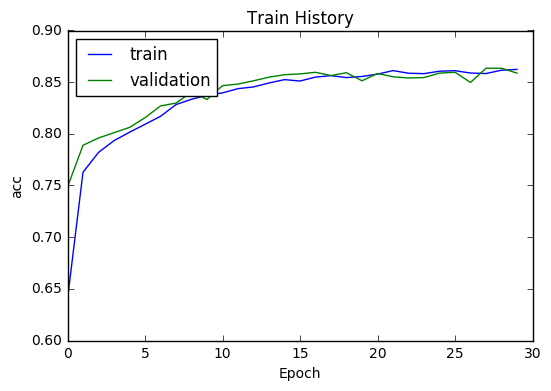

In [29]:
show_train_history(train_history,'acc','val_acc')

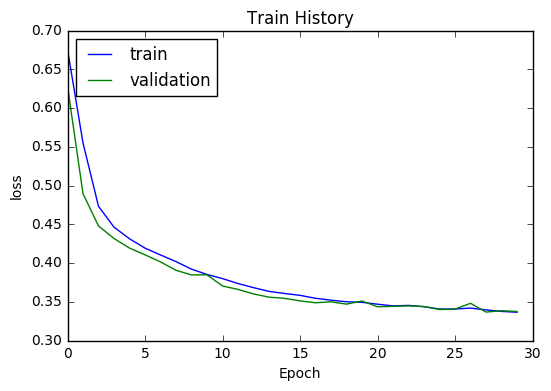

In [30]:
show_train_history(train_history,'loss','val_loss')

In [31]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

6277/6277 [==============================] - 1s 206us/step


In [32]:
scores[1]

0.8540704158037279